In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
# dataset
df = pd.read_csv(r"E:\GTech\Courses\ML\ML_Project\My_files\Midterm_checkpoint\Final\data_collection\Combined_Quali_FP2_data\qualifying_with_fp2_features_standardized_teams.csv")

df.head()

,Year,Round,GrandPrix,CircuitName,CircuitType,Location,Country,Driver,Team,LapTime_seconds,...,TrackStatus,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,WindSpeed,WindDirection,FP2_LapTime,FP2_GapToBest
0,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,ALB,Williams,92.664,...,1.0,True,19.7,57,1013.7,False,0.5,74,94.735,2.799
1,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,ALO,Alpine,91.621,...,1.0,True,19.7,57,1013.7,False,0.5,74,92.877,0.941
2,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,BOT,Kick Sauber,91.560,...,1.0,True,19.7,57,1013.7,False,0.5,74,92.951,1.015
3,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,GAS,RB,91.635,...,1.0,True,19.7,57,1013.7,False,0.5,74,93.621,1.685
4,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,HAM,Mercedes,91.048,...,1.0,True,19.7,57,1013.7,False,0.5,74,93.144,1.208


In [3]:
# Drop inaccurate laps
df = df[df["IsAccurate"] == True].copy()
df

,Year,Round,GrandPrix,CircuitName,CircuitType,Location,Country,Driver,Team,LapTime_seconds,...,TrackStatus,IsAccurate,AirTemp,Humidity,Pressure,Rainfall,WindSpeed,WindDirection,FP2_LapTime,FP2_GapToBest
0,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,ALB,Williams,92.664,...,1.0,True,19.7,57,1013.7,False,0.5,74,94.735,2.799
1,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,ALO,Alpine,91.621,...,1.0,True,19.7,57,1013.7,False,0.5,74,92.877,0.941
2,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,BOT,Kick Sauber,91.560,...,1.0,True,19.7,57,1013.7,False,0.5,74,92.951,1.015
3,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,GAS,RB,91.635,...,1.0,True,19.7,57,1013.7,False,0.5,74,93.621,1.685
4,2022,1,Bahrain Grand Prix,Bahrain Grand Prix,permanent,Sakhir,Bahrain,HAM,Mercedes,91.048,...,1.0,True,19.7,57,1013.7,False,0.5,74,93.144,1.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2025,10,Canadian Grand Prix,Canadian Grand Prix,permanent,Montréal,Canada,RUS,Mercedes,70.899,...,1.0,True,21.2,29,1019.0,False,3.1,356,72.123,0.000
1453,2025,10,Canadian Grand Prix,Canadian Grand Prix,permanent,Montréal,Canada,SAI,Williams,72.398,...,1.0,True,21.2,29,1019.0,False,3.1,356,72.631,0.508
1454,2025,10,Canadian Grand Prix,Canadian Grand Prix,permanent,Montréal,Canada,STR,Aston Martin,72.517,...,1.0,True,21.2,29,1019.0,False,3.1,356,NaN,NaN
1455,2025,10,Canadian Grand Prix,Canadian Grand Prix,permanent,Montréal,Canada,TSU,Red Bull,72.102,...,1.0,True,21.2,29,1019.0,False,3.1,356,72.939,0.816


In [4]:
# Convert categorical columns
categorical_cols = ["Driver", "Team", "Tyre", "CircuitType","FreshTyre", "GrandPrix"]   #adding fresh tyre feature 
numeric_cols = [
    "Year", "Round", "AirTemp", "Humidity", "Pressure", "Rainfall",
    "WindSpeed", "WindDirection", "TyreLife", "Sector1Time", "Sector2Time", "Sector3Time", "FP2_LapTime", "FP2_GapToBest"
]

In [5]:
# Fill missing values
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("cat", cat_pipeline, categorical_cols),
    ("num", num_pipeline, numeric_cols)
])

# Fit and transform features
X = df[categorical_cols + numeric_cols]
y = df["LapTime_seconds"]
X_processed = preprocessor.fit_transform(X)

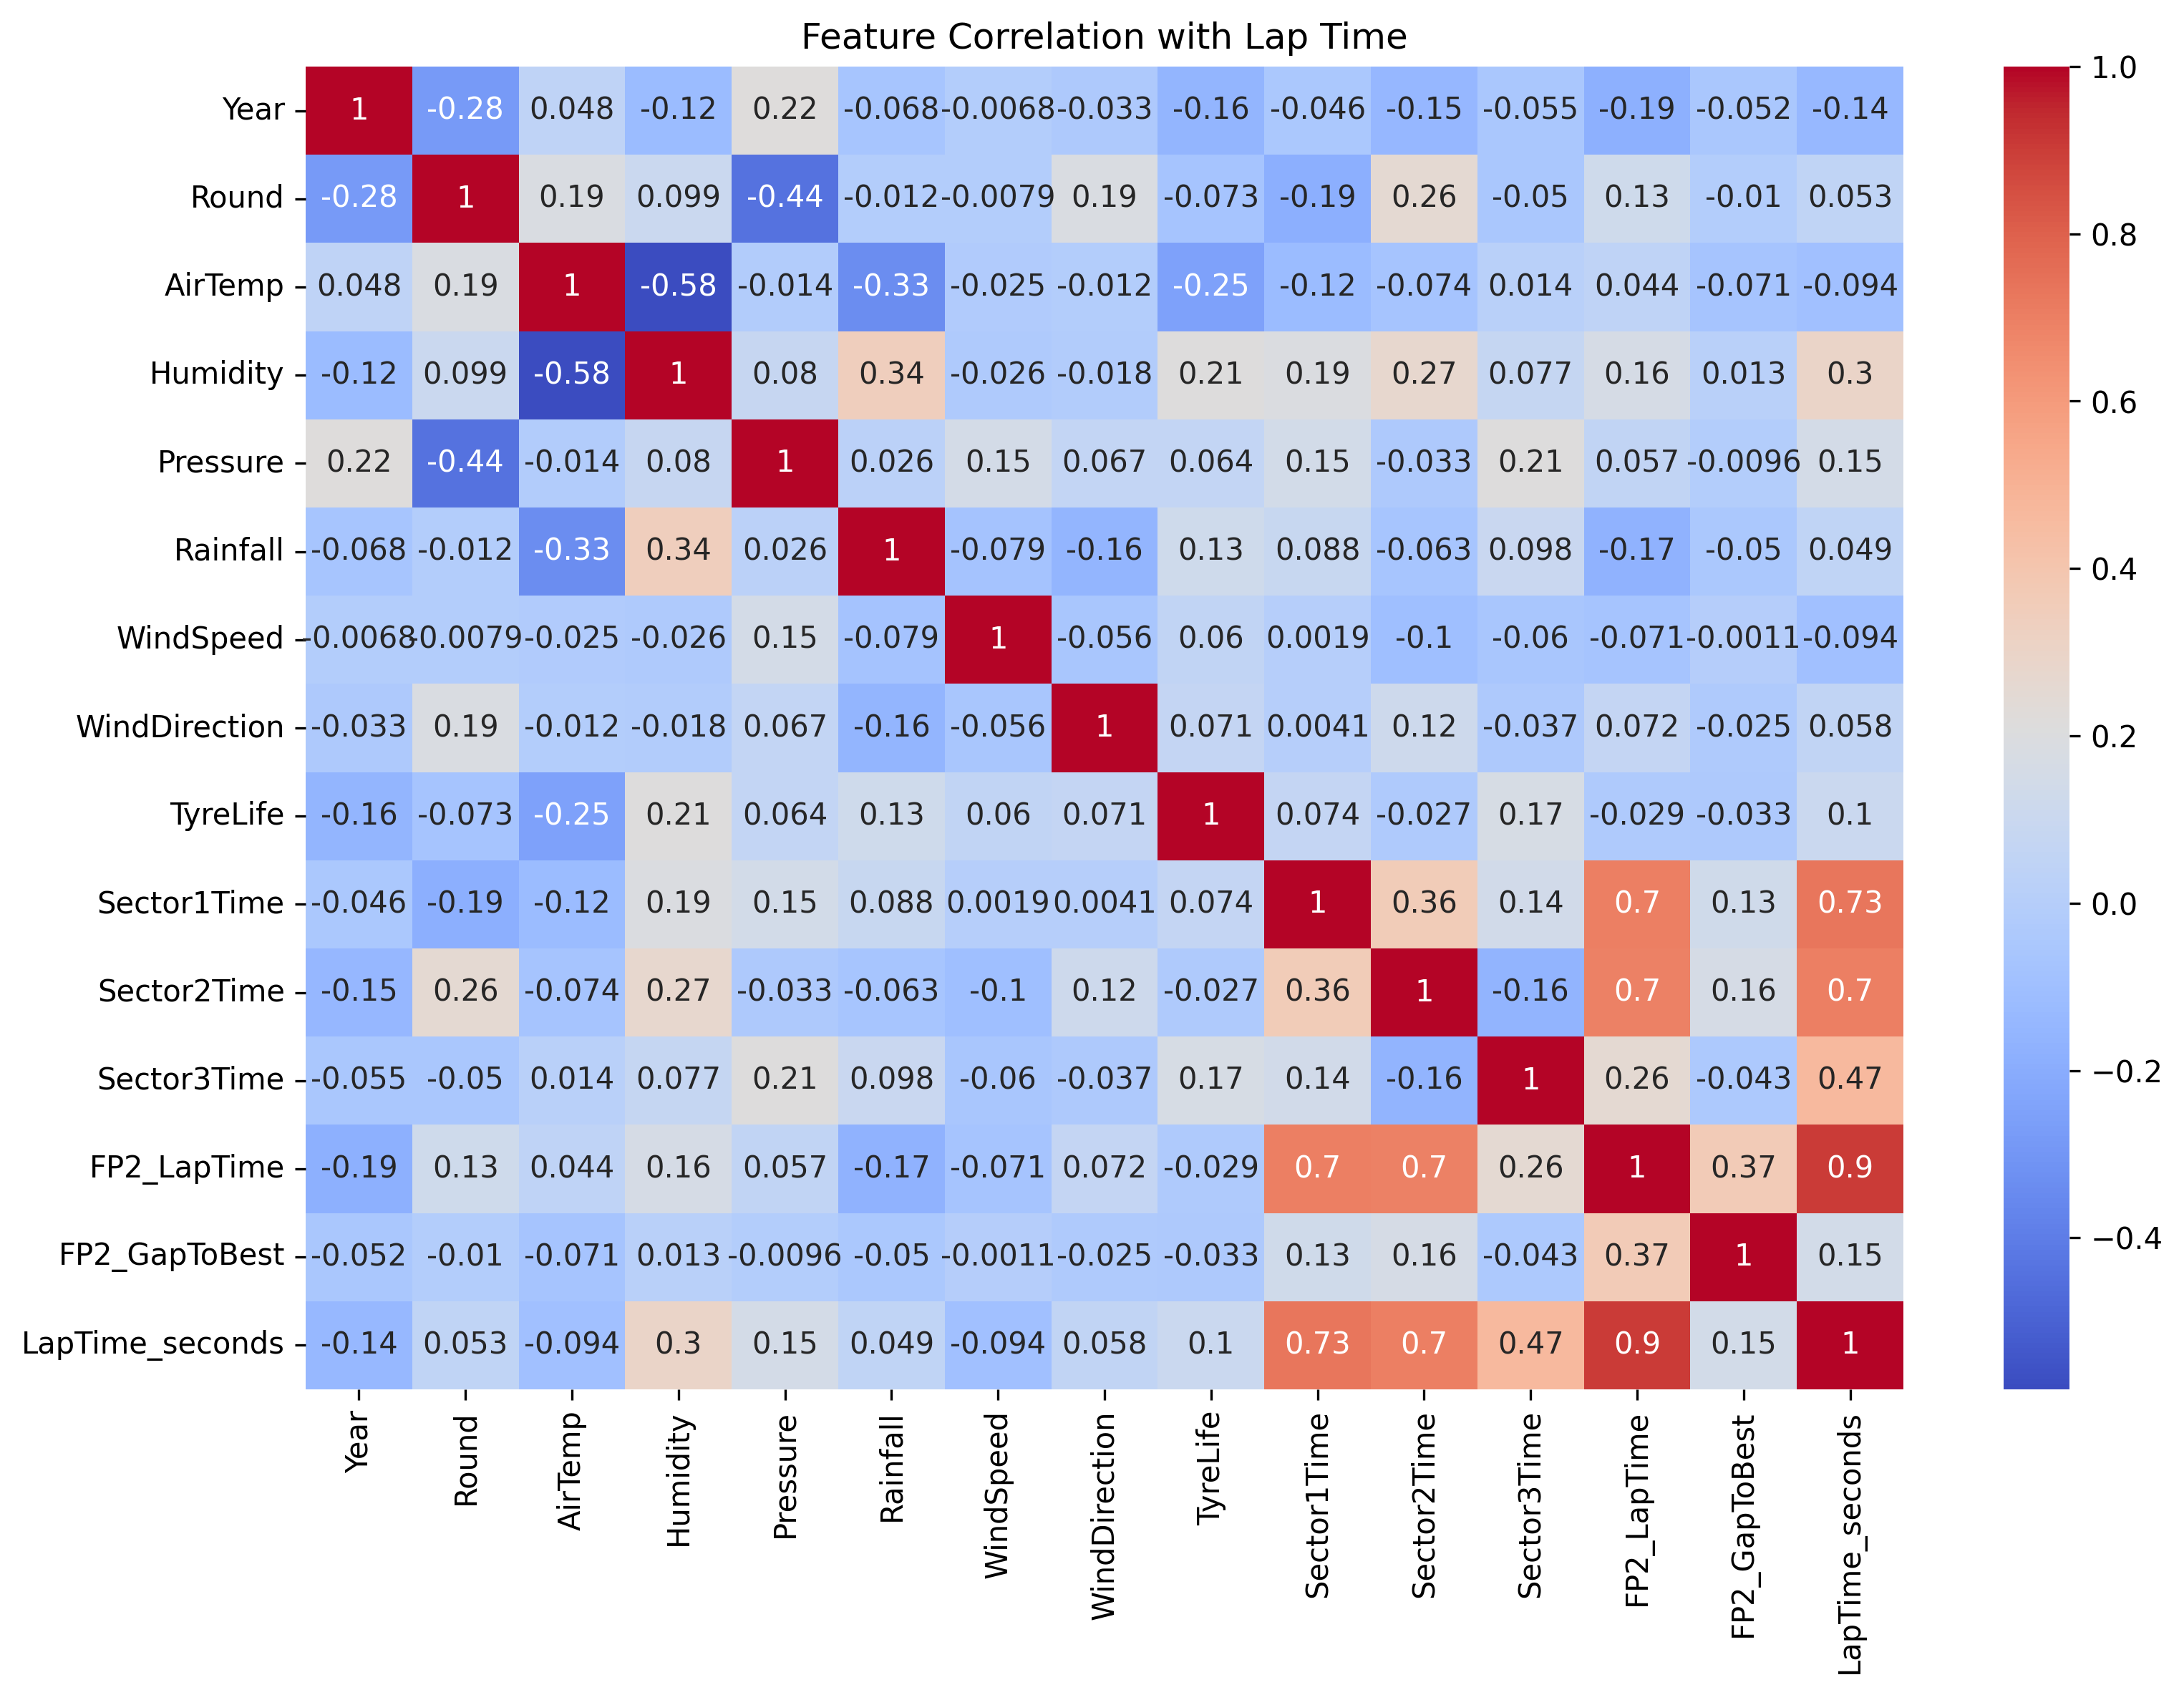

In [7]:
# correlations
plt.figure(figsize=(12, 8),dpi=300)
sns.heatmap(df[numeric_cols + ["LapTime_seconds"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Lap Time")
plt.show()

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\1615021396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lap_corr.values, y=lap_corr.index, palette="coolwarm")


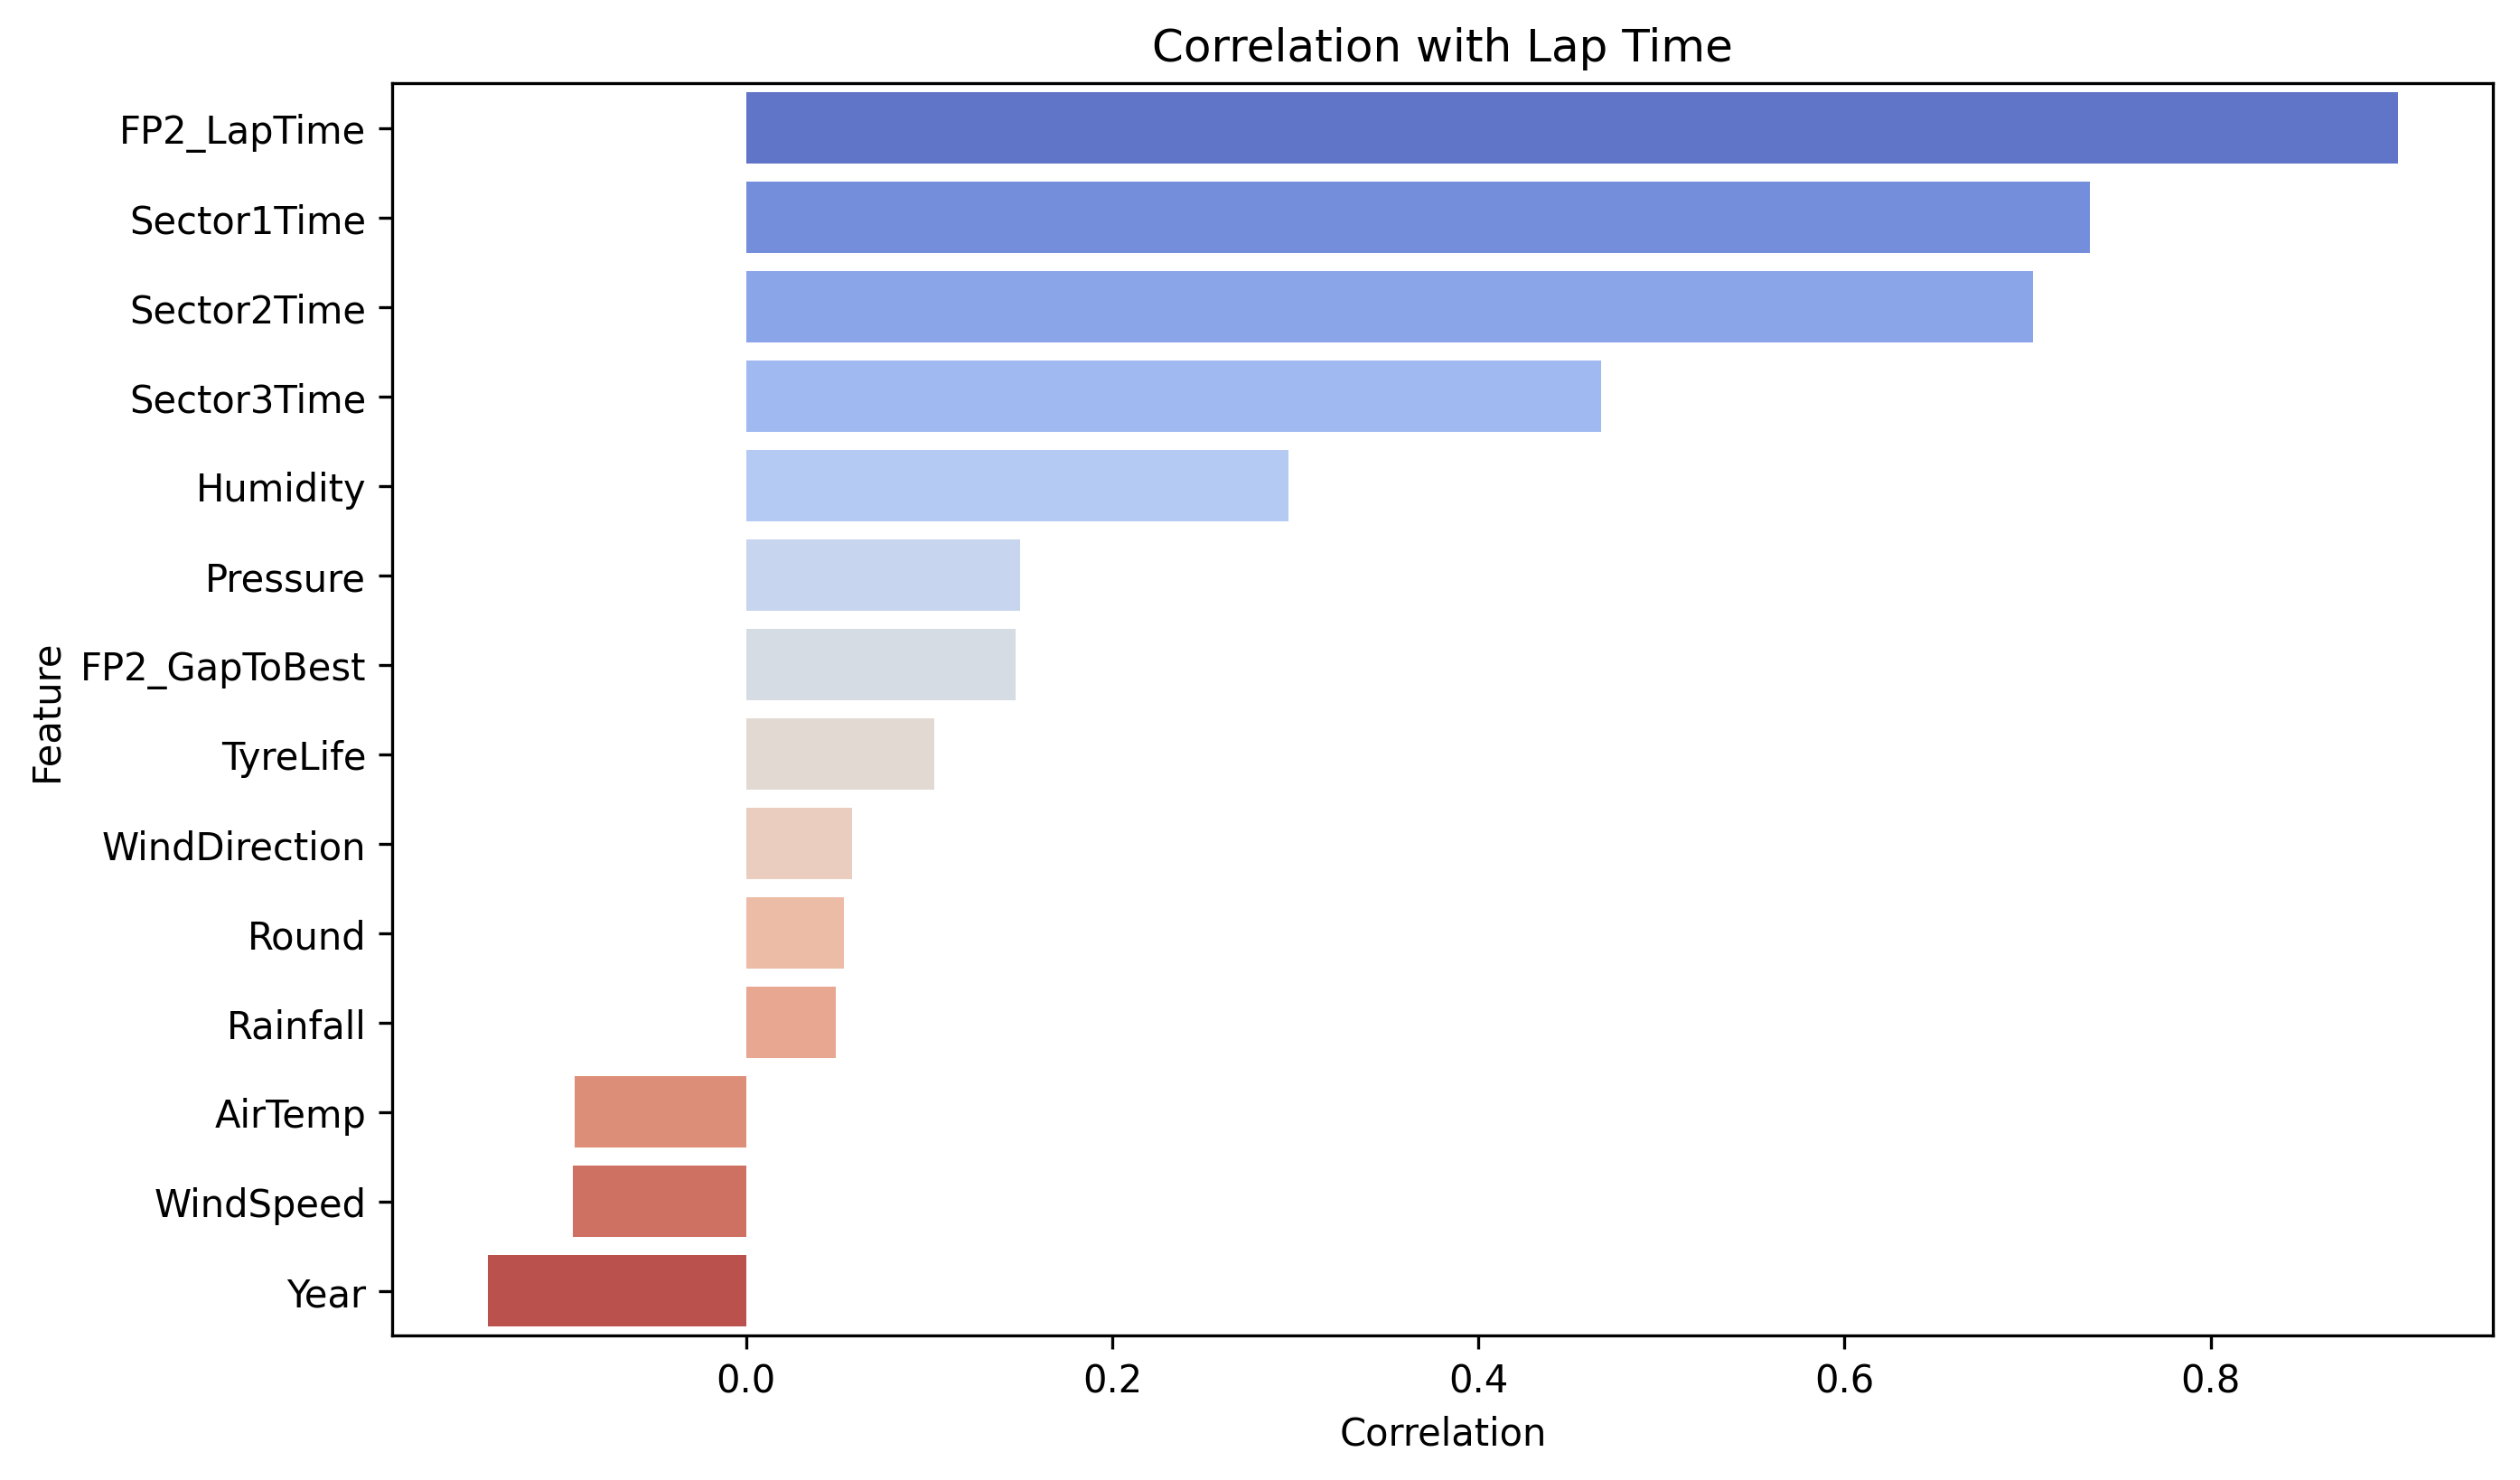

In [8]:
corr_matrix = df[numeric_cols + ["LapTime_seconds"]].corr()
lap_corr = corr_matrix["LapTime_seconds"].drop("LapTime_seconds").sort_values(ascending=False)

plt.figure(figsize=(10, 6),dpi=300)
sns.barplot(x=lap_corr.values, y=lap_corr.index, palette="coolwarm")
plt.title("Correlation with Lap Time")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


In [17]:
cat_features = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_cols)
num_features = numeric_cols

all_feature_names = list(cat_features) + num_features

X_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed,
                    columns=all_feature_names)

X_df.head()


,Driver_ALB,Driver_ALO,Driver_ANT,Driver_BEA,Driver_BOR,Driver_BOT,Driver_COL,Driver_DEV,Driver_DOO,Driver_GAS,...,Pressure,Rainfall,WindSpeed,WindDirection,TyreLife,Sector1Time,Sector2Time,Sector3Time,FP2_LapTime,FP2_GapToBest
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.491941,-0.299459,-1.266276,-1.161317,-0.437201,0.641844,1.025083,-0.485289,1.031898,0.930796
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.491941,-0.299459,-1.266276,-1.161317,-0.437201,0.590457,0.942890,-0.518262,0.834497,-0.173303
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.491941,-0.299459,-1.266276,-1.161317,-0.437201,0.569942,0.941640,-0.509549,0.842359,-0.129329
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.491941,-0.299459,-1.266276,-1.161317,-0.437201,0.579901,0.947055,-0.511941,0.913542,0.268812
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.491941,-0.299459,-1.266276,-1.161317,-0.437201,0.549428,0.905819,-0.535346,0.862864,-0.014641


In [18]:
# Export X_df and y
output_path = "f1_processed_qualifying_data_with_FP2.xlsx"

with pd.ExcelWriter(output_path) as writer:
    X_df.to_excel(writer, sheet_name="Features", index=False)
    y.to_frame(name="LapTime_seconds").to_excel(writer, sheet_name="Target", index=False)

print(f"Exported to {output_path}")

Exported to f1_processed_qualifying_data_with_FP2.xlsx


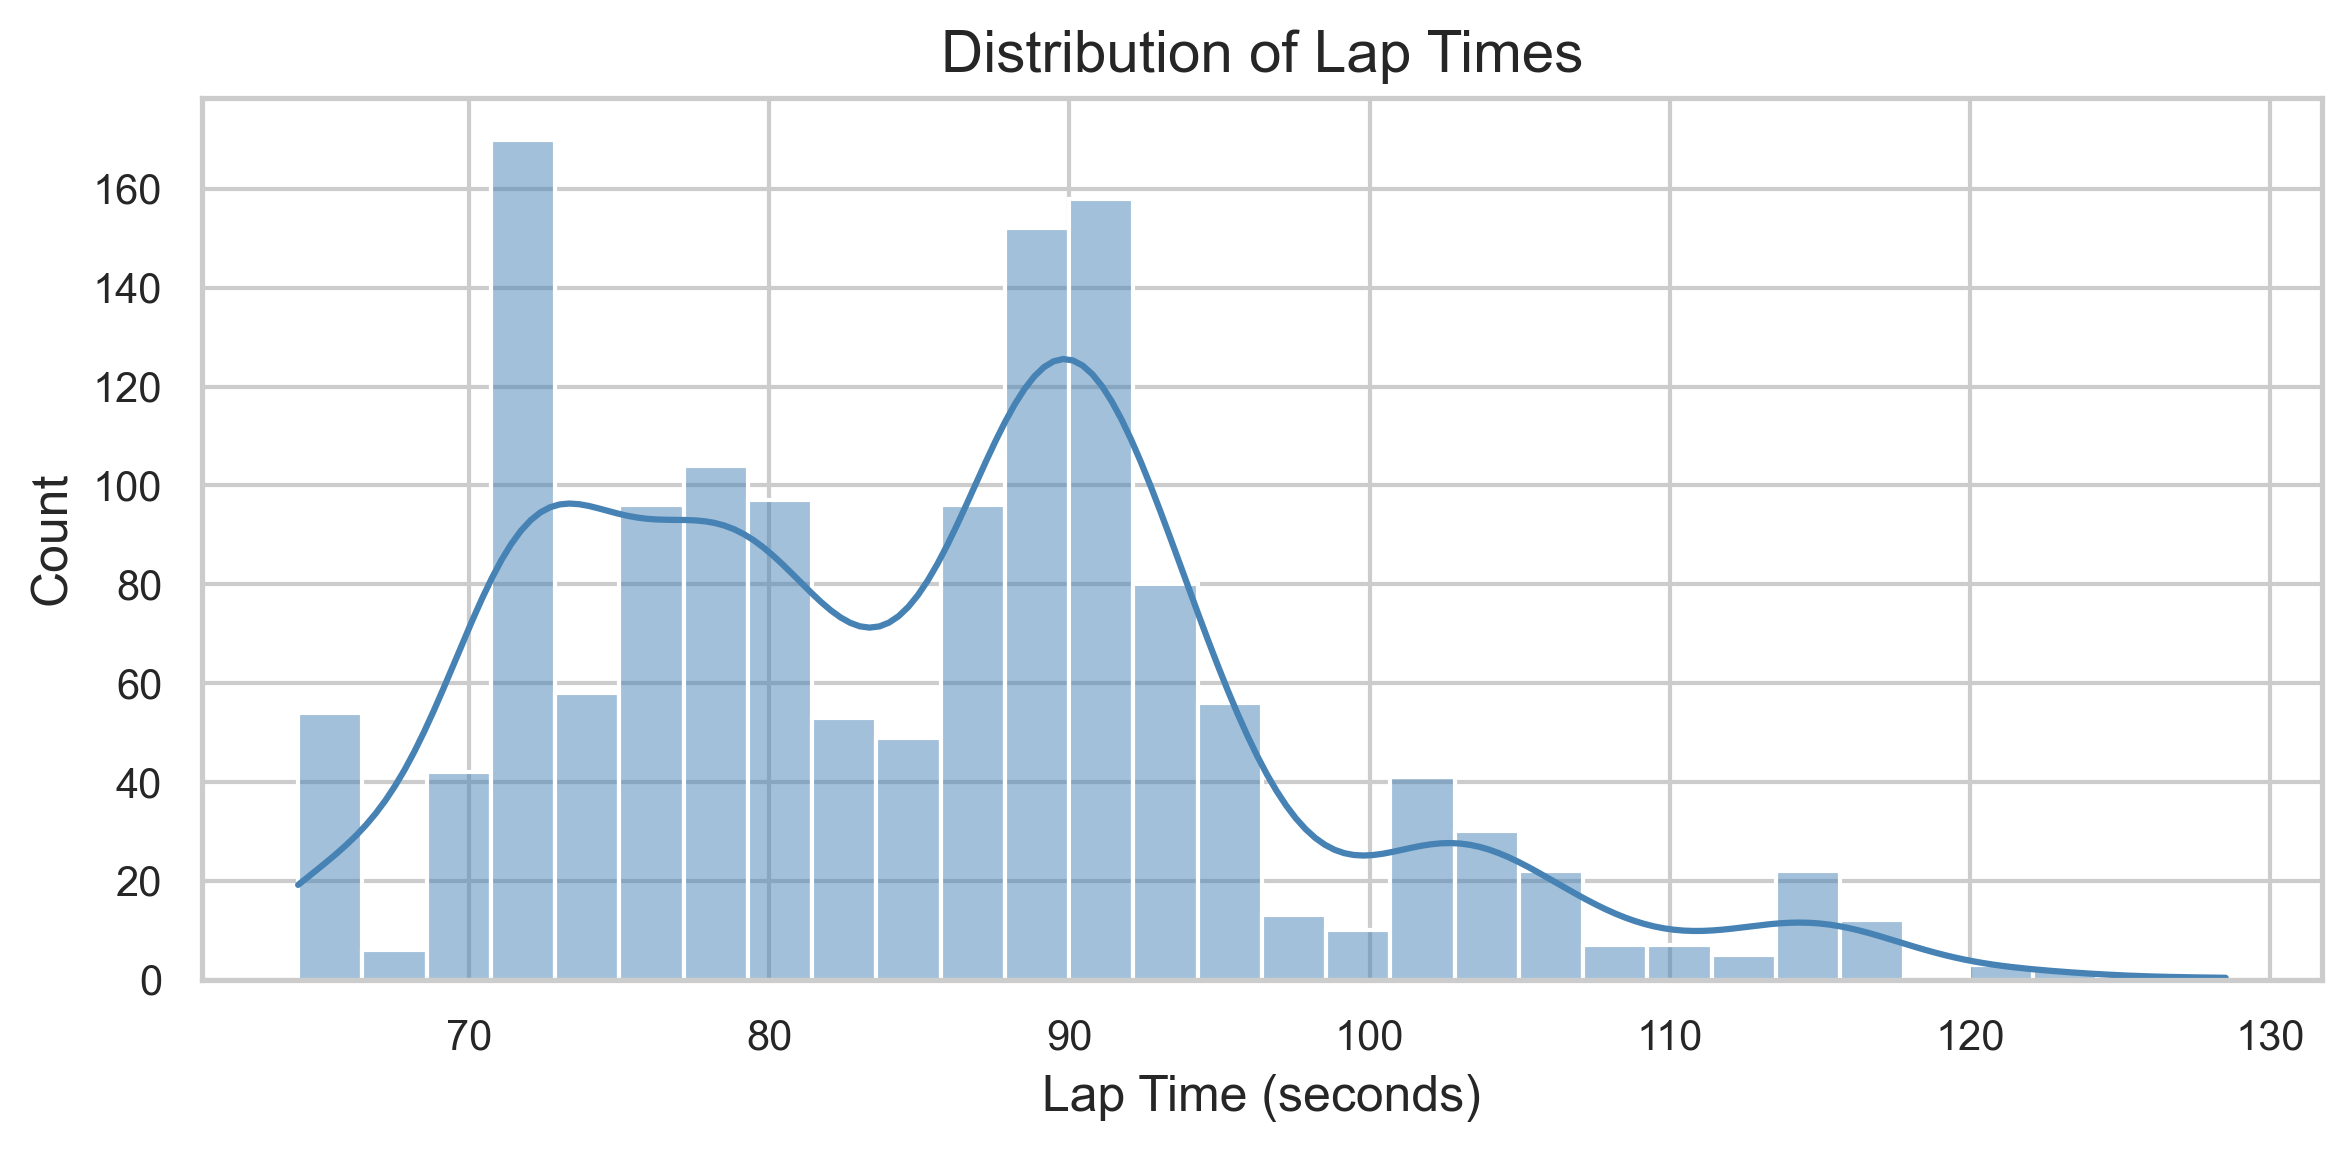

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\4235535624.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Tyre", y="LapTime_seconds", palette="pastel")


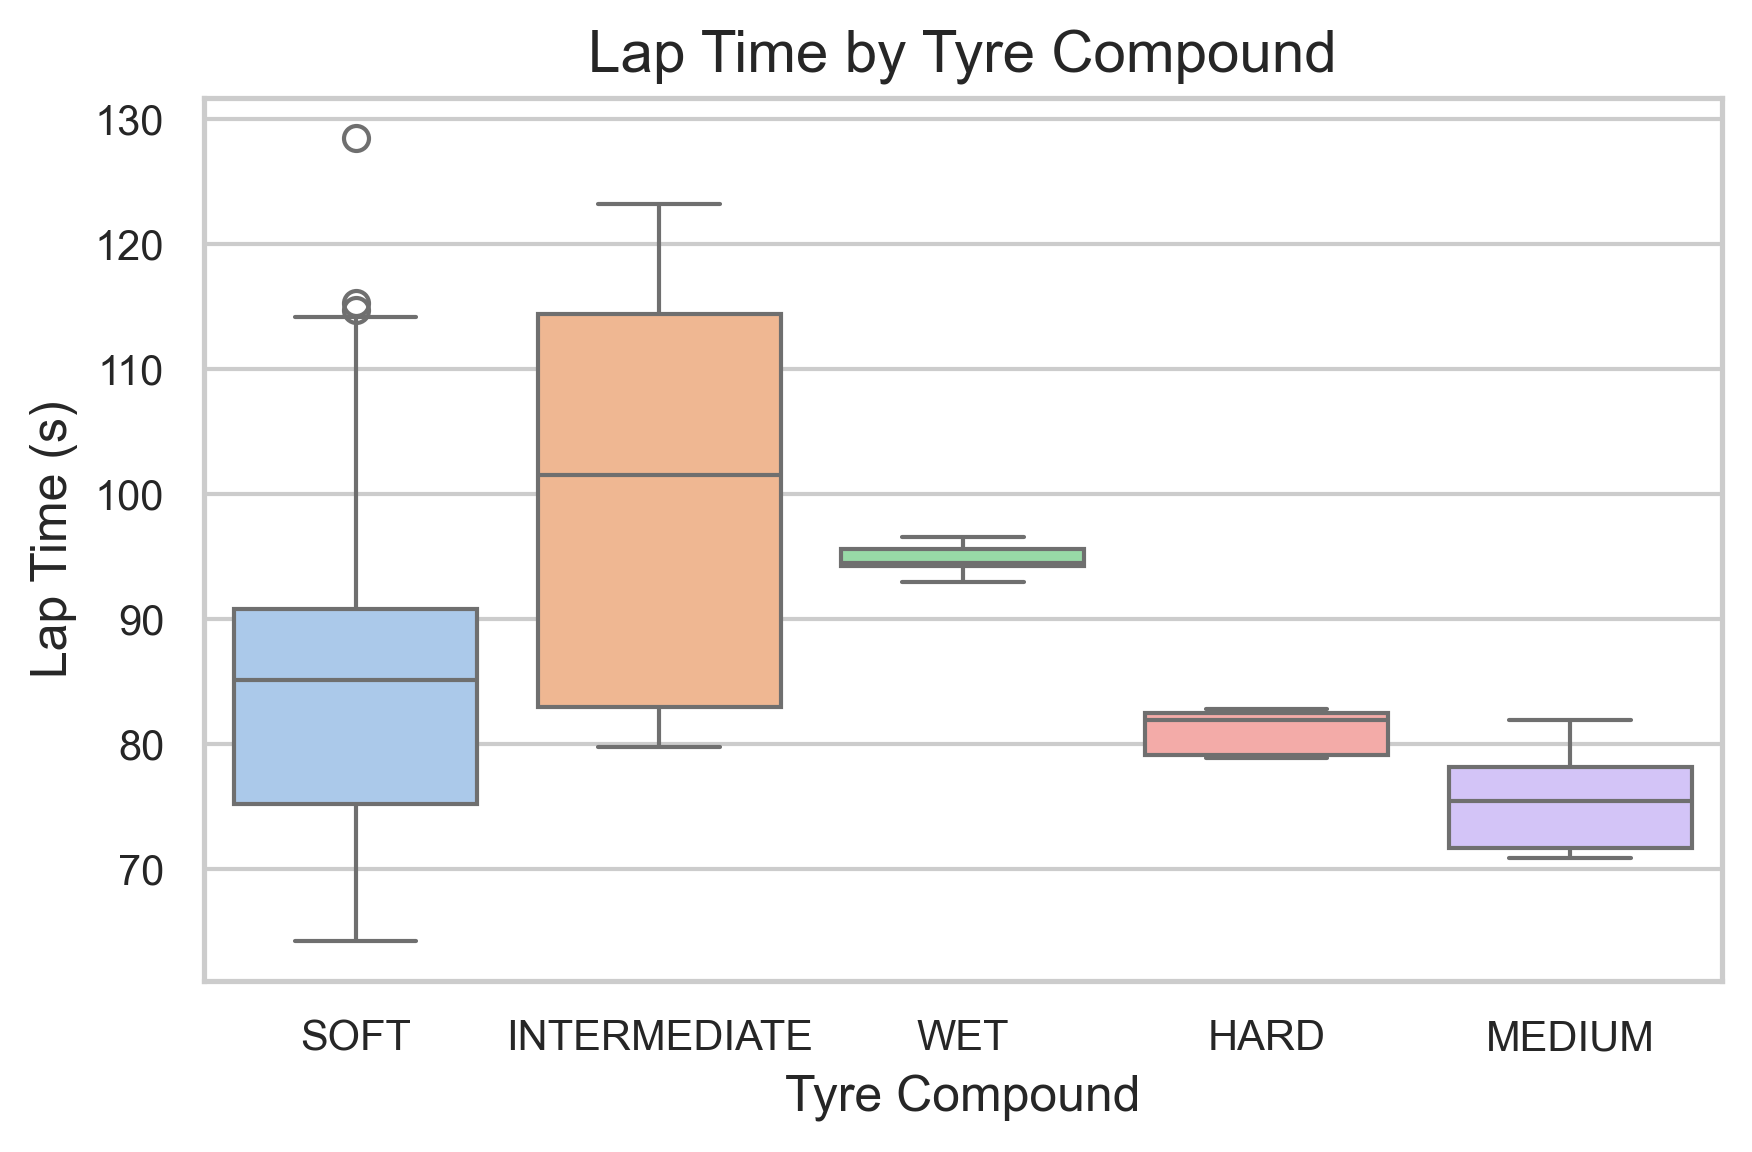

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\4235535624.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="TyreLife", y="LapTime_seconds", palette="pastel")


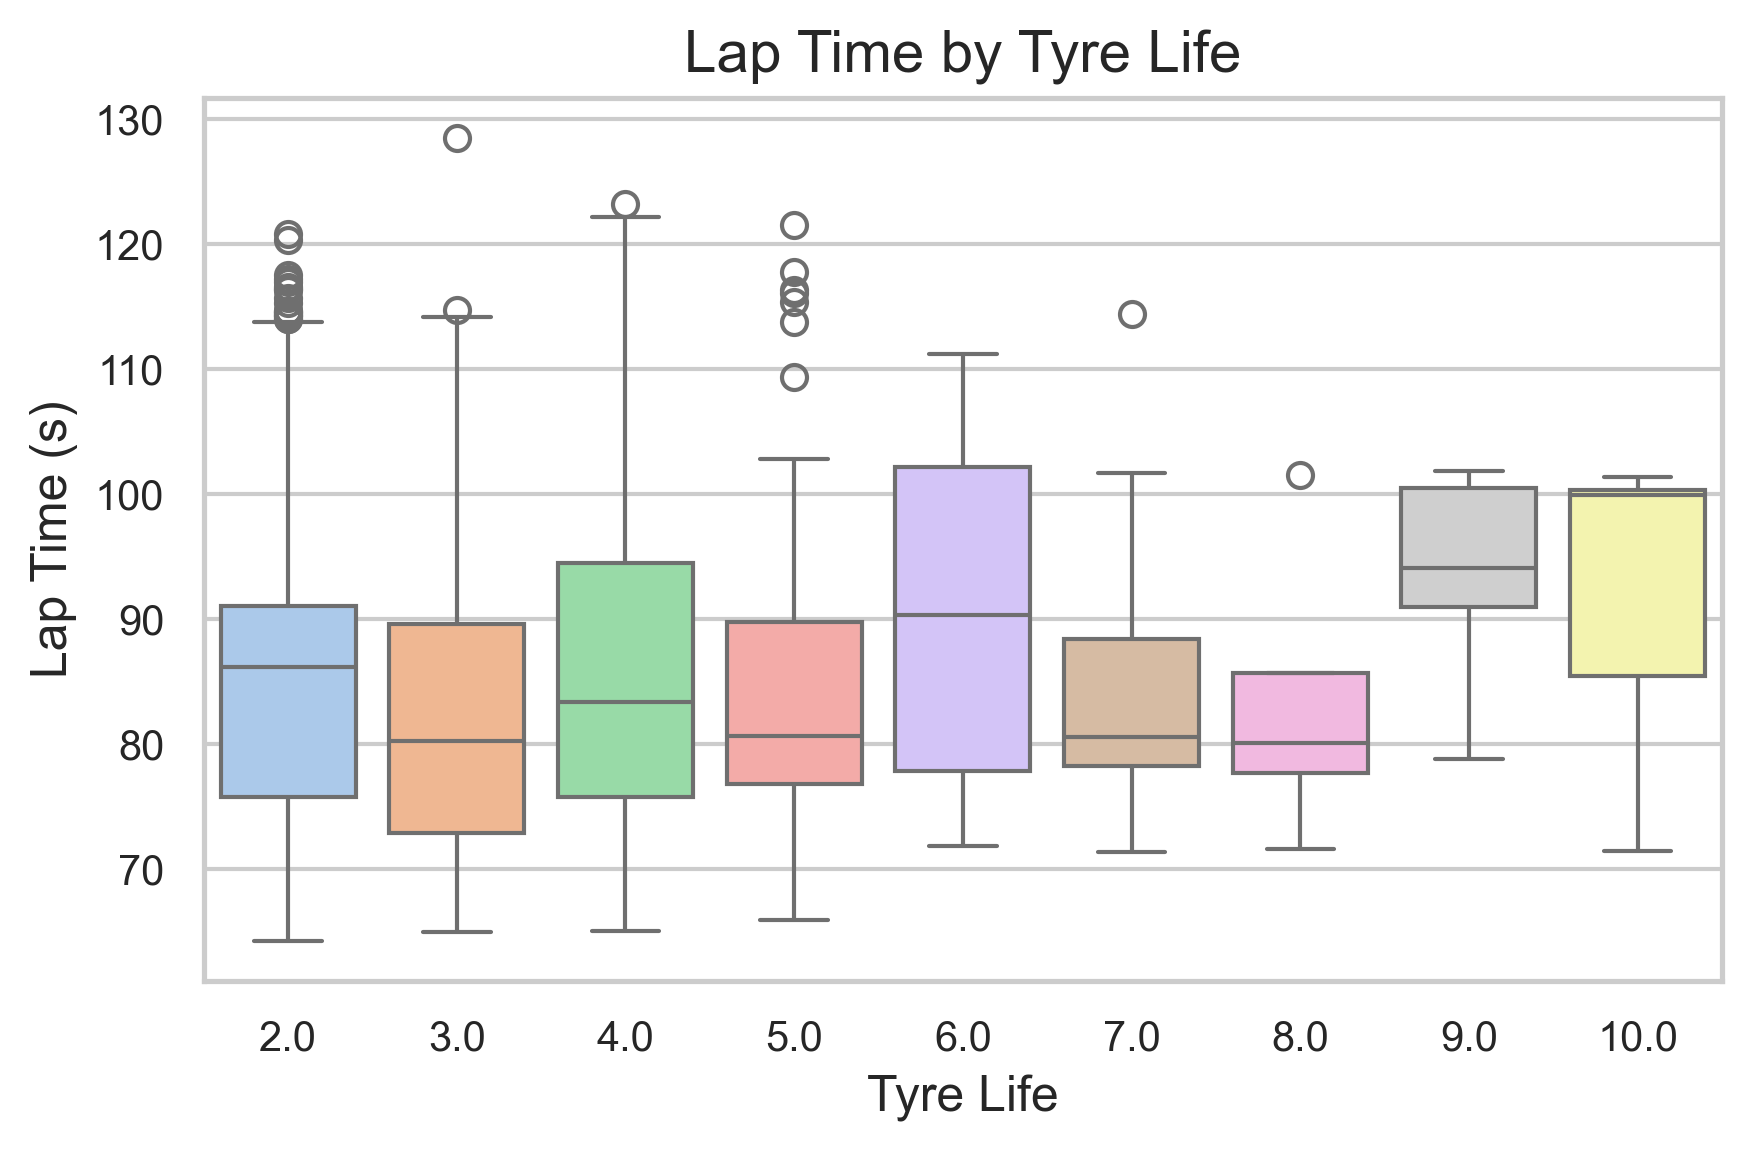

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\4235535624.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="FreshTyre", y="LapTime_seconds", palette="Set2")


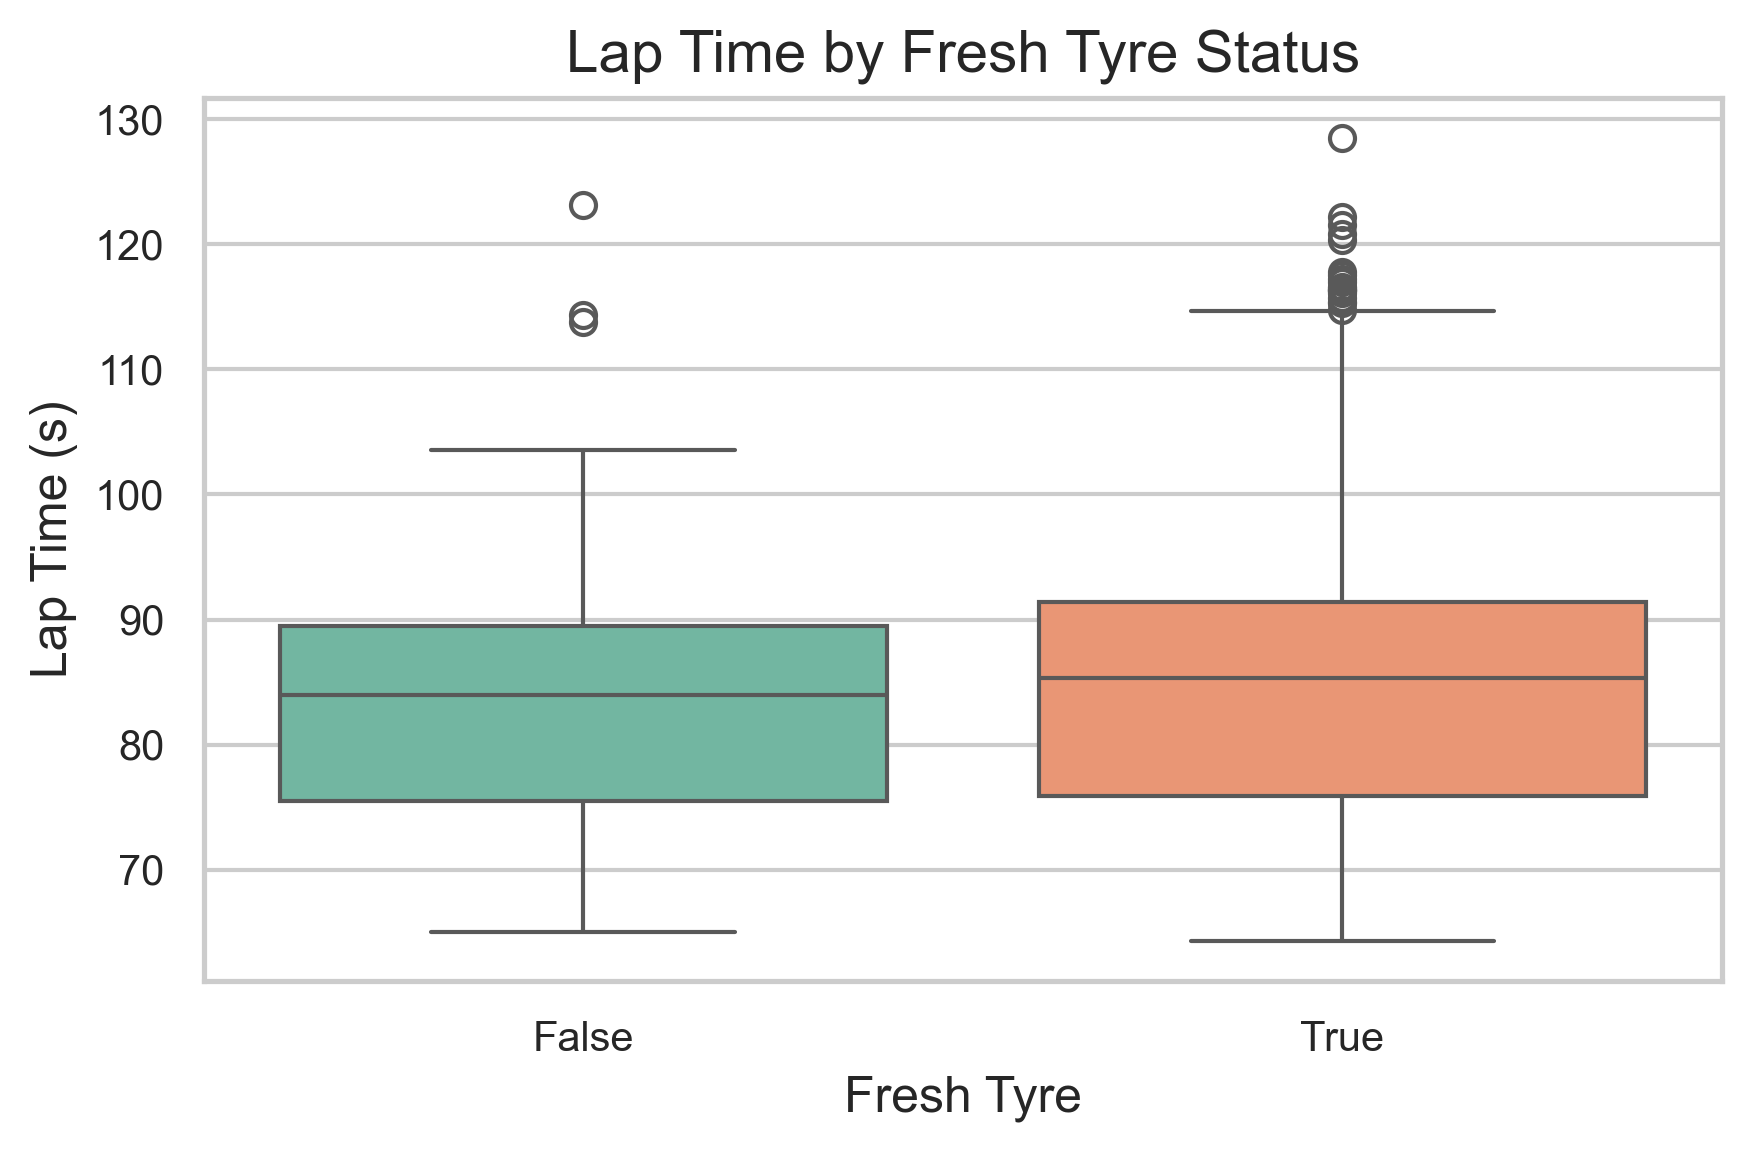

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\4235535624.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="CircuitType", y="LapTime_seconds", palette="Set3")


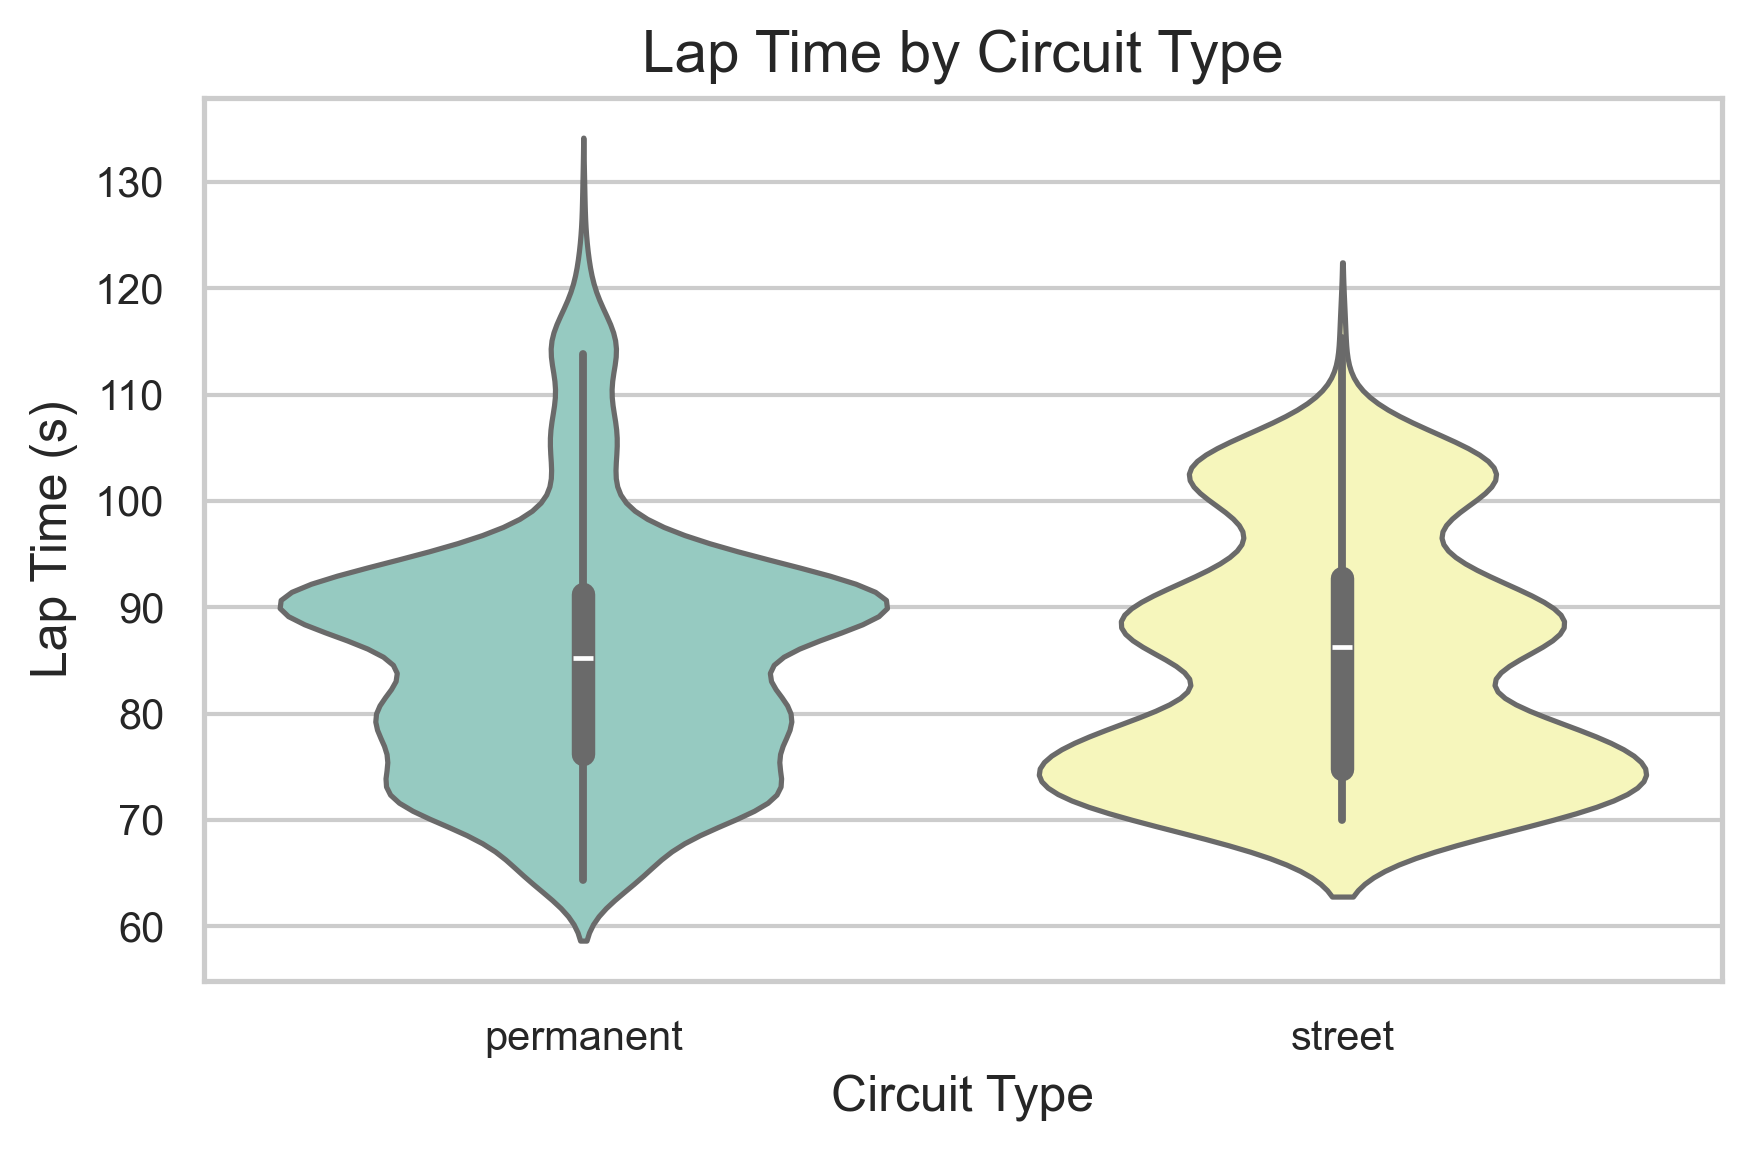

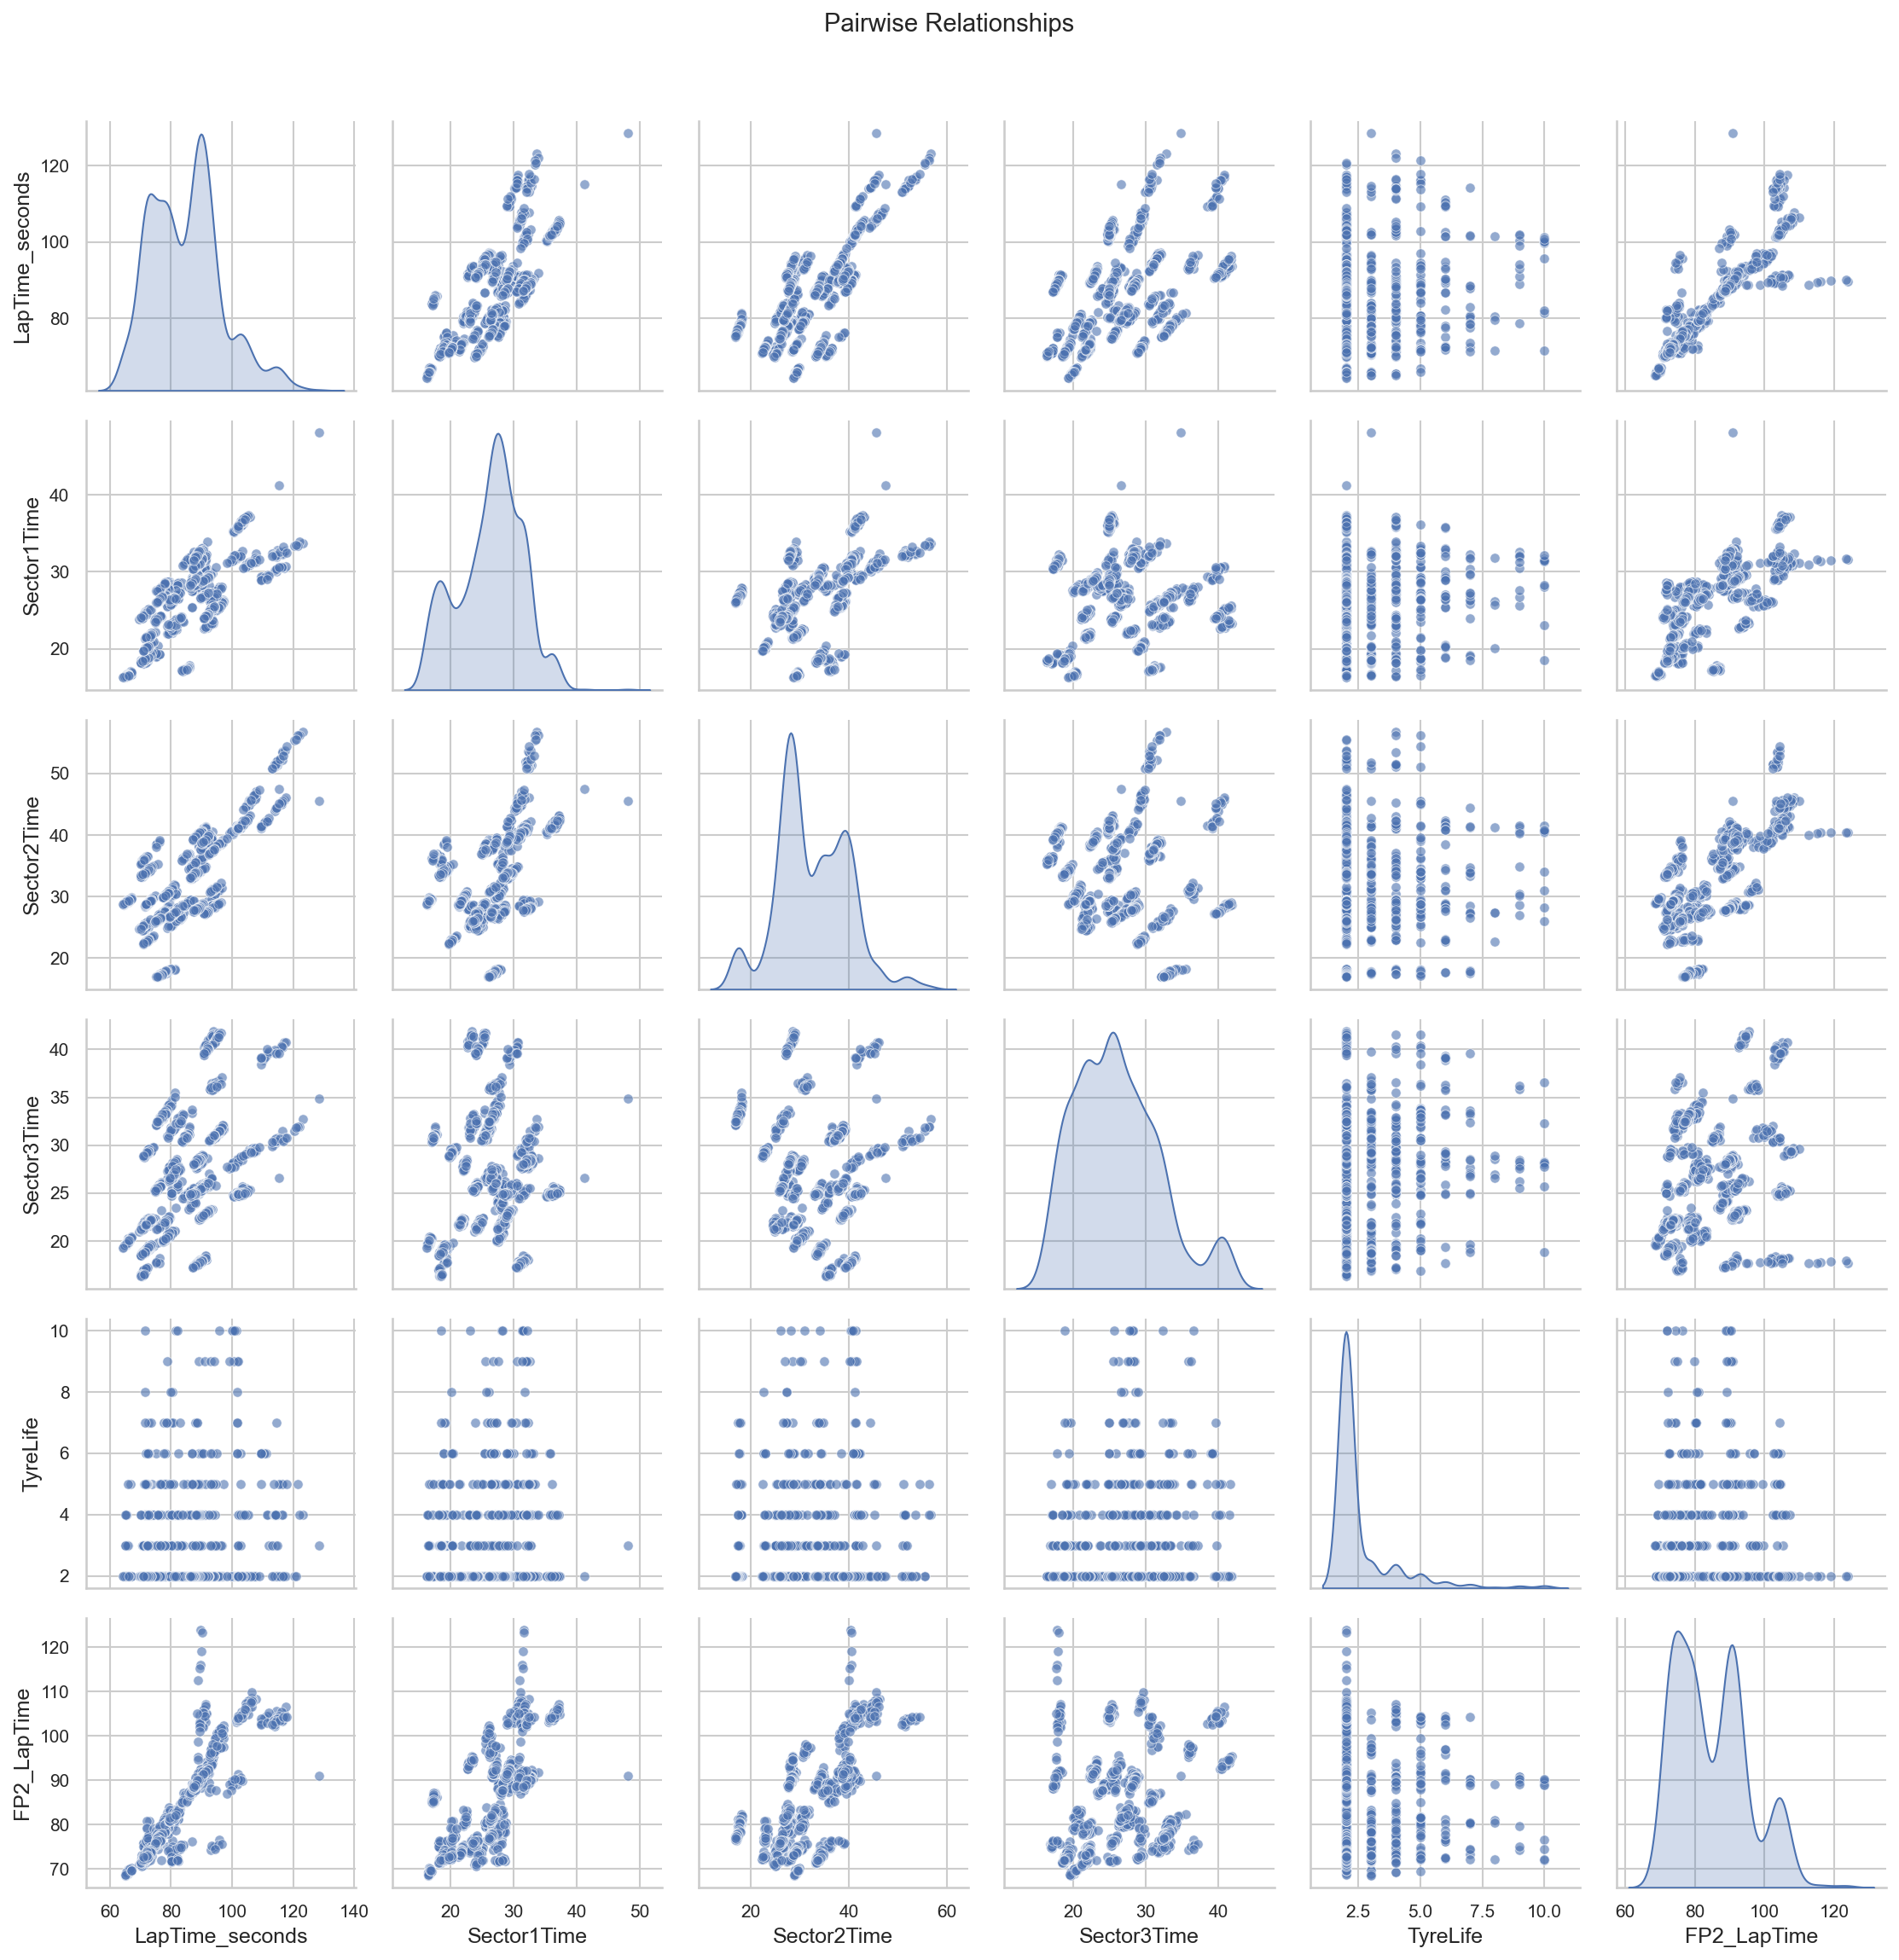

C:\Users\psingh414\AppData\Local\Temp\ipykernel_27448\4235535624.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Tyre", order=df["Tyre"].value_counts().index, palette="muted")


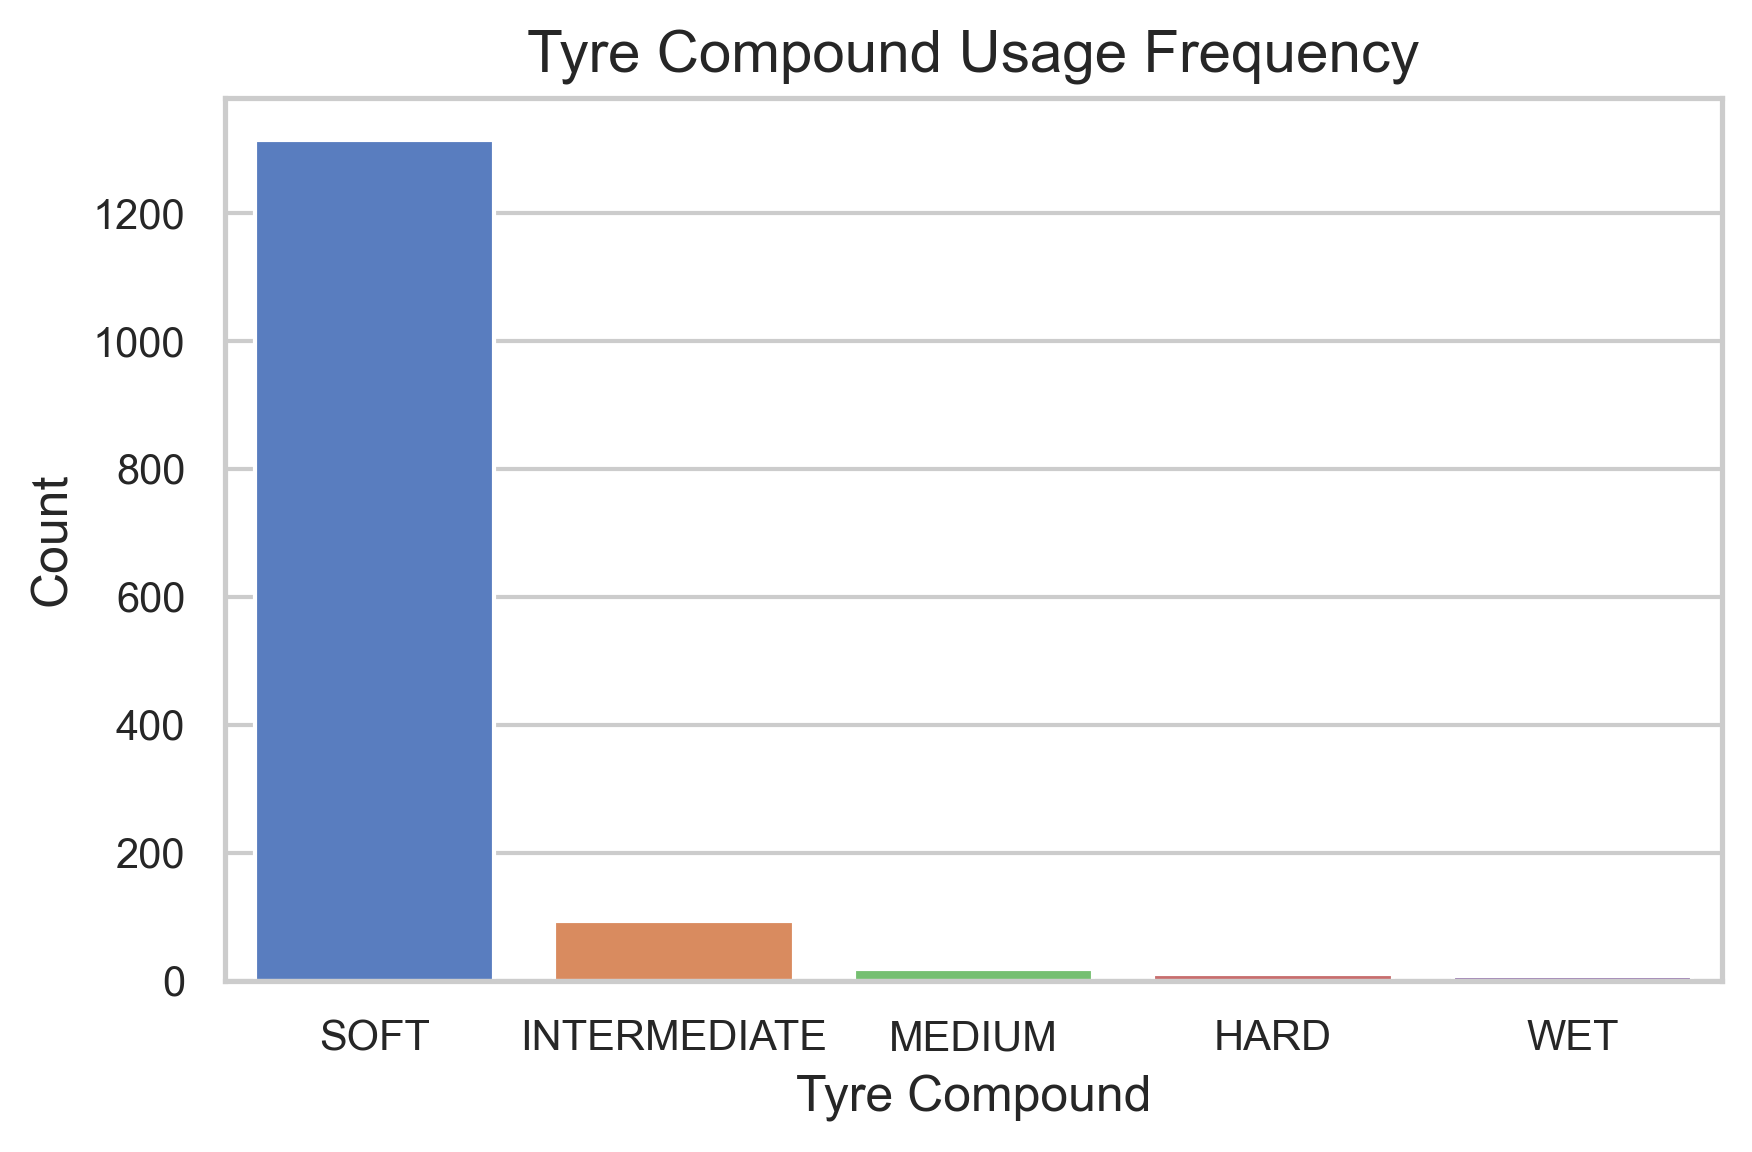

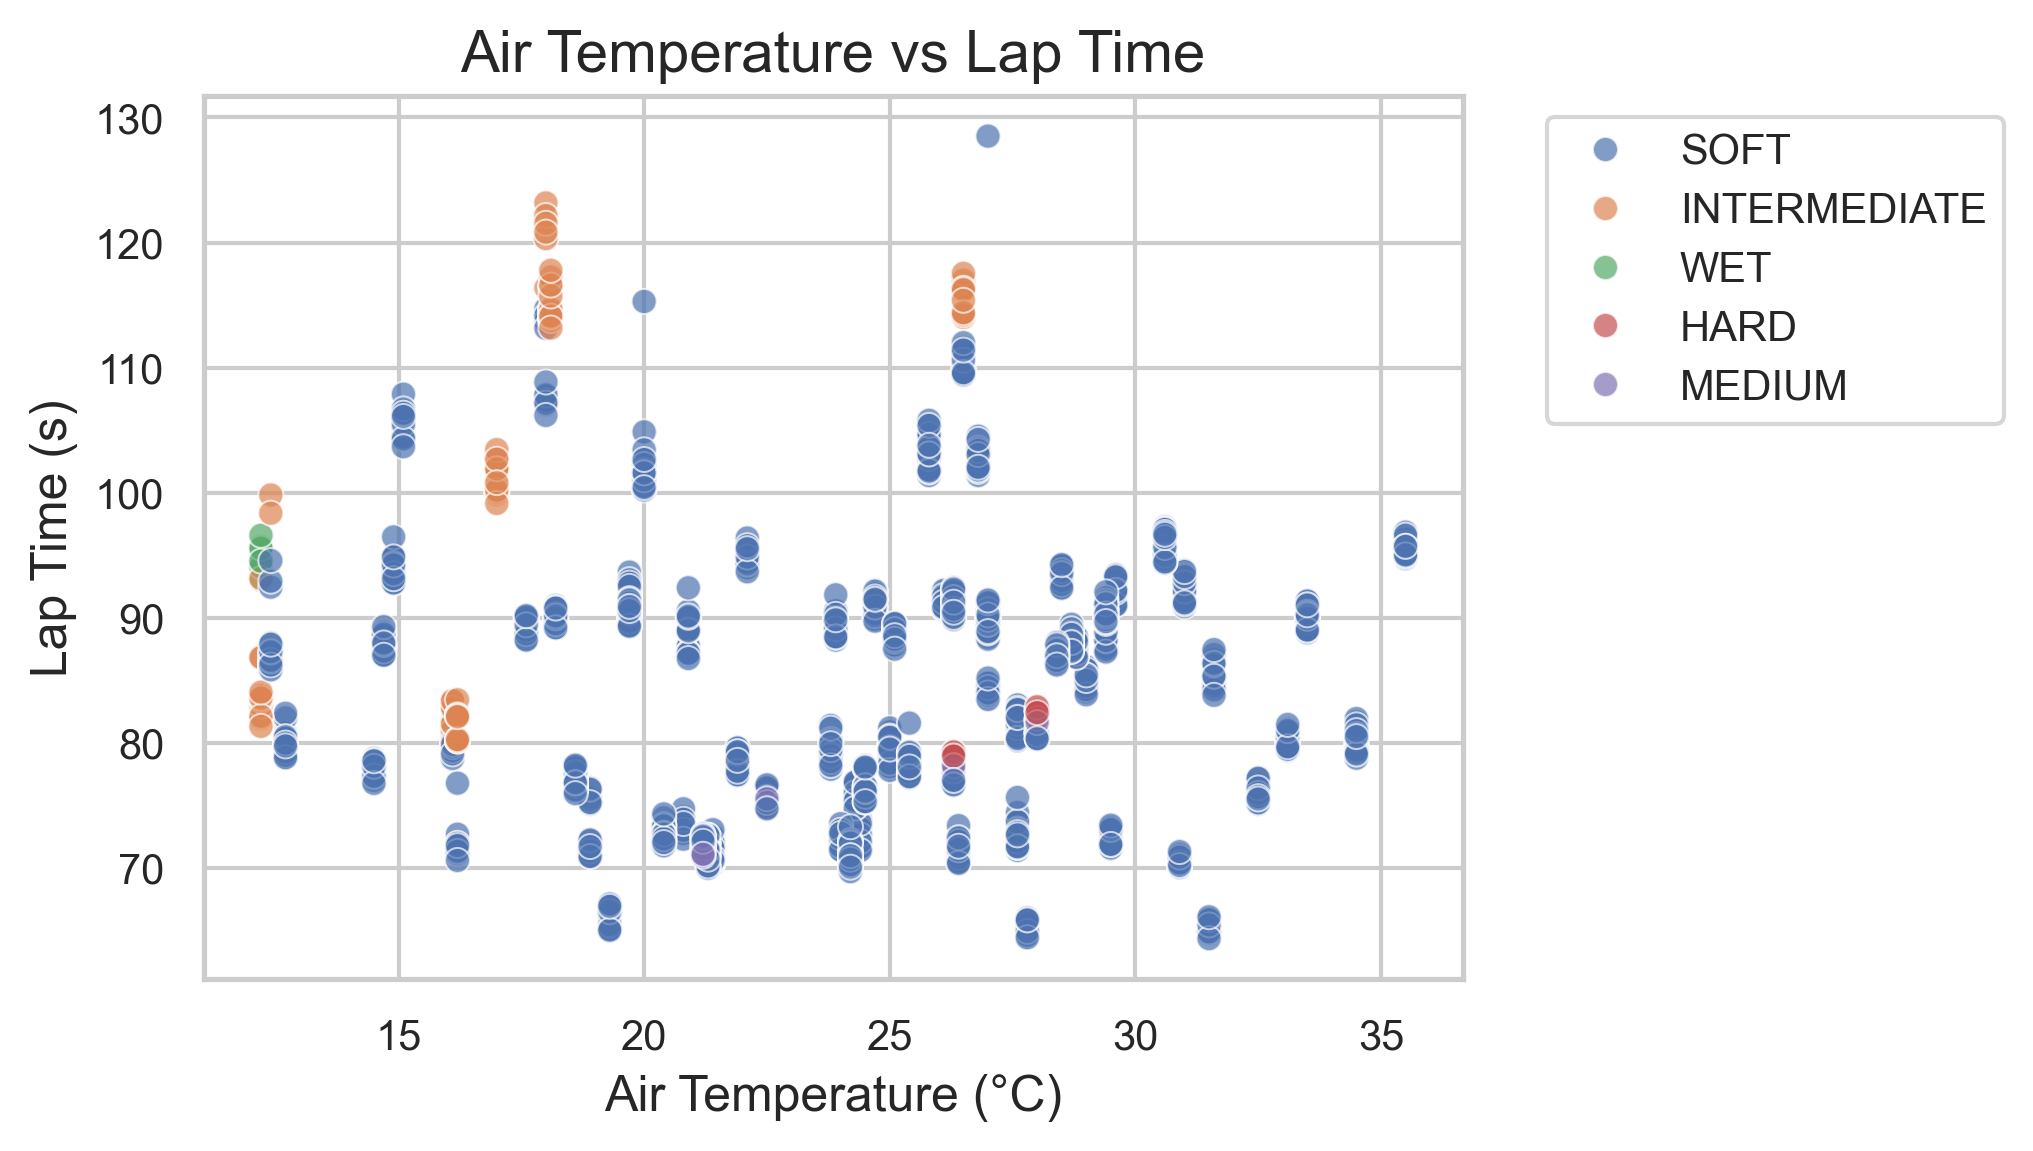

In [23]:
sns.set(style="whitegrid")
plt.rcParams.update({
    "figure.dpi": 150,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10
})

# dataset
df = pd.read_csv(r"E:\GTech\Courses\ML\ML_Project\My_files\Midterm_checkpoint\Final\data_collection\Combined_Quali_FP2_data\qualifying_with_fp2_features_standardized_teams.csv")

# ========== 1. Distribution Plots ==========
plt.figure(figsize=(8, 4),dpi=300)
sns.histplot(df["LapTime_seconds"], kde=True, bins=30, color="steelblue")
plt.title("Distribution of Lap Times")
plt.xlabel("Lap Time (seconds)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ========== 2. Boxplots ==========
plt.figure(figsize=(6, 4),dpi=300)
sns.boxplot(data=df, x="Tyre", y="LapTime_seconds", palette="pastel")
plt.title("Lap Time by Tyre Compound")
plt.xlabel("Tyre Compound")
plt.ylabel("Lap Time (s)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4),dpi=300)
sns.boxplot(data=df, x="TyreLife", y="LapTime_seconds", palette="pastel")
plt.title("Lap Time by Tyre Life")
plt.xlabel("Tyre Life")
plt.ylabel("Lap Time (s)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4),dpi=300)
sns.boxplot(data=df, x="FreshTyre", y="LapTime_seconds", palette="Set2")
plt.title("Lap Time by Fresh Tyre Status")
plt.xlabel("Fresh Tyre")
plt.ylabel("Lap Time (s)")
plt.tight_layout()
plt.show()

# ========== 3. Violin Plot ==========
plt.figure(figsize=(6, 4),dpi=300)
sns.violinplot(data=df, x="CircuitType", y="LapTime_seconds", palette="Set3")
plt.title("Lap Time by Circuit Type")
plt.xlabel("Circuit Type")
plt.ylabel("Lap Time (s)")
plt.tight_layout()
plt.show()

# ========== 4. Trend Plot ==========
#plt.figure(figsize=(10, 5),dpi=300)
#sns.lineplot(data=df, x="Round", y="LapTime_seconds", hue="Driver", estimator="min", lw=1)
#plt.title("Fastest Lap Times by Driver Across Rounds")
#plt.xlabel("Round")
#lt.ylabel("Fastest Lap Time (s)")
#lt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#plt.show()

# ========== 5. Pair Plot ==========
sns.pairplot(df[["LapTime_seconds", "Sector1Time", "Sector2Time", "Sector3Time", "TyreLife", "FP2_LapTime"]],
             diag_kind="kde", plot_kws={"alpha": 0.6, "s": 30})
plt.suptitle("Pairwise Relationships", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# ========== 6. Count Plot ==========
plt.figure(figsize=(6, 4),dpi=300)
sns.countplot(data=df, x="Tyre", order=df["Tyre"].value_counts().index, palette="muted")
plt.title("Tyre Compound Usage Frequency")
plt.xlabel("Tyre Compound")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ========== 7. Weather vs Lap Time ==========
plt.figure(figsize=(7, 4),dpi=300)
sns.scatterplot(data=df, x="AirTemp", y="LapTime_seconds", hue="Tyre", alpha=0.7)
plt.title("Air Temperature vs Lap Time")
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Lap Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
